In [29]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.descriptivestats import sign_test
import seaborn as sns
import pandas as pd

%matplotlib inline

## Задача 1

## Задача 2

In [13]:
data = pd.read_csv('./data/glass.dat', sep=' *', index_col=0)

/Users/akupriyanov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/akupriyanov/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/akupriyanov/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [14]:
data[:3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,3.01,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,WinF
2,-0.39,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,WinF
3,-1.82,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,WinF


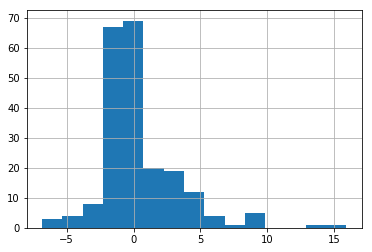

In [20]:
data['RI'].hist(bins=15)
plt.show()

In [22]:
sample = data['RI'].values

Выберем оптимальную ширину пропускания: (метод из лекции)

In [47]:
def optimal_window(sample, i=8):
    return np.mean(list(map(lambda elem: np.sort(np.abs(sample - elem))[i + 1], sample)))

In [48]:
window_optimal = optimal_window(sample)
window_optimal

0.46200934579439257

Ядерная оценка плотности и доверительные интервалы:

In [72]:
grid = np.linspace(np.min(sample), np.max(sample), 200)

def kde_for_one_sample(sample, h_window):
    bs_sample = np.random.choice(sample, len(sample), replace=True)
    kde = sm.nonparametric.kde.KDEUnivariate(bs_sample)
    kde.fit(bw=h_window)
    return kde.evaluate(grid)

In [73]:
def bootstrap_for_CI(sample, h_window, alpha=0.05, n_iter=1000):
    kde_grids = np.sort([kde_for_one_sample(sample, h_window) for _ in range(n_iter)], axis=0)
    left_ci, right_ci = int(n_iter*alpha/2), n_iter - int(n_iter*alpha/2)
    return kde_grids[left_ci], kde_grids[right_ci]

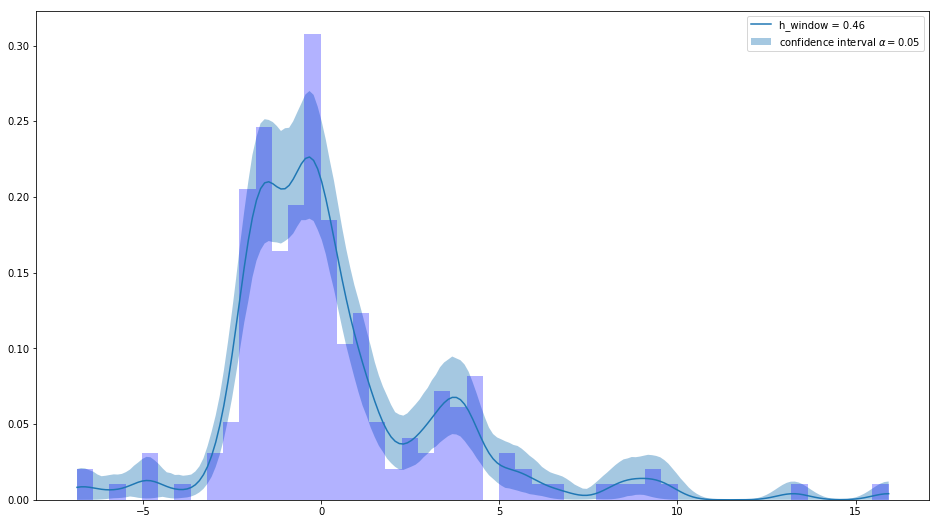

In [84]:
plt.figure(figsize = (16, 9))
kde = sm.nonparametric.kde.KDEUnivariate(sample).fit(bw=window_optimal)
plt.plot(grid, p.evaluate(grid), label = 'h_window = {:.2f}'.format(window_optimal))
left_ci, right_ci = bootstrap_for_CI(sample, window_optimal)
plt.fill_between(grid, left_ci, right_ci, alpha=0.4, label=r'confidence interval $\alpha = 0.05$')
plt.hist(sample, bins=50, normed=True, alpha=0.3, color='blue')
plt.legend()
plt.show()

**Вывод:**

Действительно, исходя из графика была получена хорошая оценка плотности и доверительный интервал